In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = 'BaseData/Training'
CATEGORIES = ['A','B','C','D','Delete','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','Space','T',
              'U','V','W','X','Y','Z',]

A | B | C | D | Delete | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | Space | T | U | V | W | X | Y | Z | unique_labels =  ['A', 'B', 'C', 'D', 'Delete', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


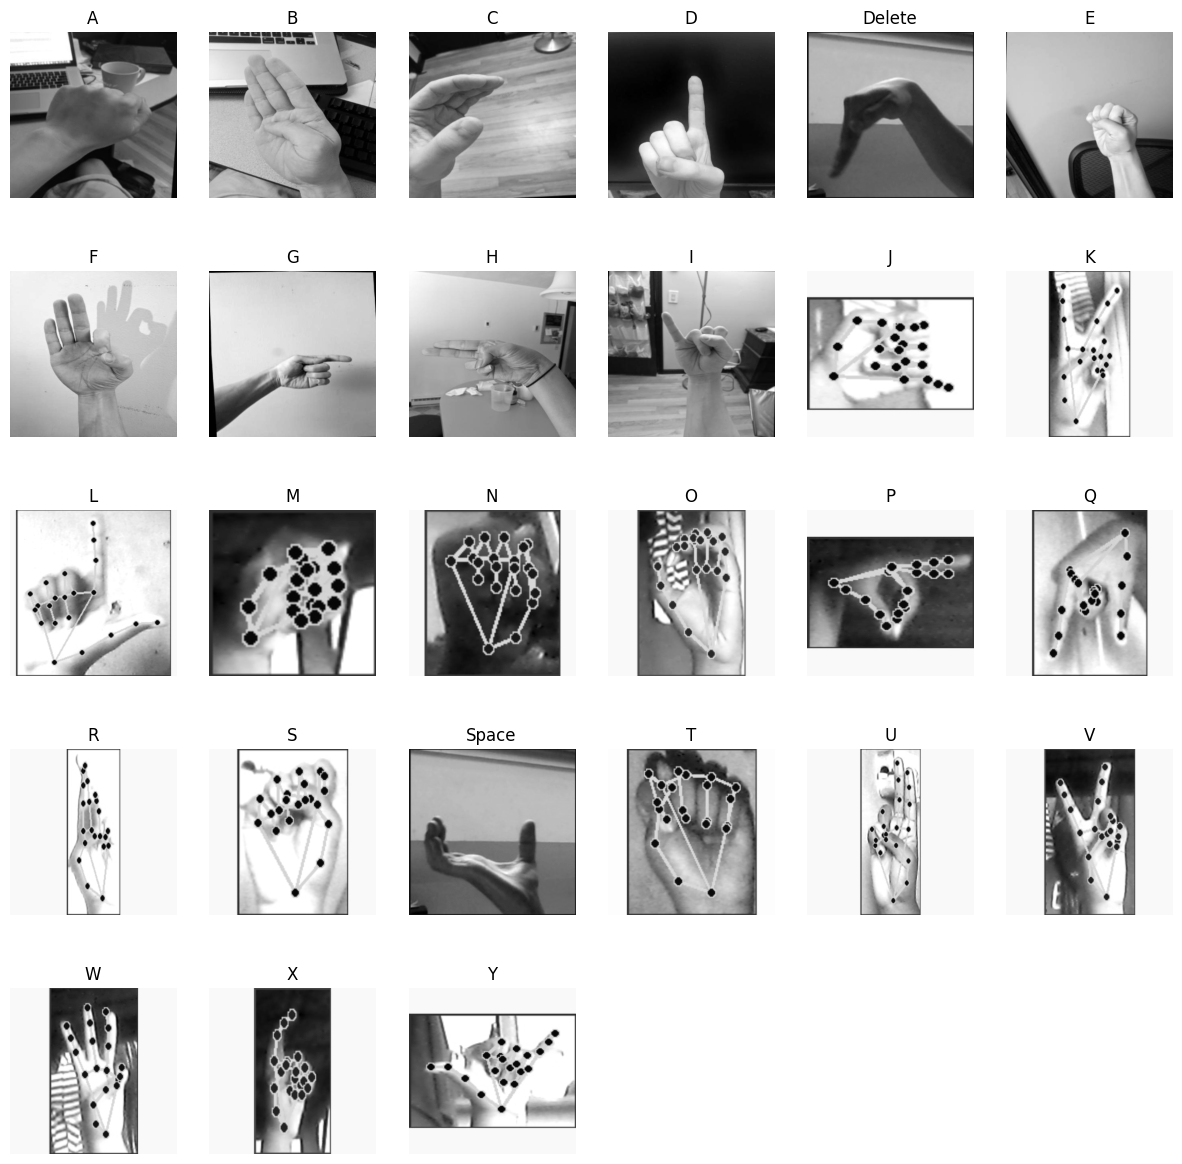

In [3]:
def load_unique(DIR):
    images_for_plot = []
    labels_for_plot = []
    size_img = 300,300
    for category in CATEGORIES:
        path = os.path.join(DIR,category)
        class_num = category
        print(category, end = ' | ')
        for img in os.listdir(path):
            image = cv2.imread(os.path.join(path,img))
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
            images_for_plot.append(final_img)
            labels_for_plot.append(class_num)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique(data_dir)
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image, cmap = 'gray')
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    if i > 27 :
      break
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [4]:
def load_data_train(DIR):
    train_data = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for category in CATEGORIES:
        path = os.path.join(DIR,category)
        class_num=CATEGORIES.index(category)
        print(category, end = ' | ')
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,size)
                final_img = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                train_data.append([final_img,class_num])
            except:
                print(os.path.join(path,img))
    random.shuffle(train_data)
    X=[]
    Y=[]
    for features, label in train_data:
        X.append(features)
        Y.append(label)
    X = np.array(X).reshape(-1,64,64,1)
    Y = np.array(Y)
    X = X.astype('float32')/255.0
    
    Y = keras.utils.to_categorical(Y,28)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test


In [10]:

def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,1)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(1024, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(28, activation = 'softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.000001)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])
    print("MODEL CREATED")
    model.summary()
    return model

def fit_model():
    checkpointer = ModelCheckpoint(filepath='my_model_five.keras', verbose=1, 
                               save_best_only=True)
    model_hist = model.fit(X_train, Y_train, batch_size = 50, epochs = 20,
          validation_split = 0.2, callbacks = [checkpointer], 
          verbose=1, shuffle=True)
    return model_hist

In [6]:
X_train, X_test, Y_train, Y_test = load_data_train(data_dir)

LOADING DATA FROM : A | B | C | D | Delete | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | Space | T | U | V | W | X | Y | Z | 
Loaded 74897 images for training, Train data shape = (74897, 64, 64, 1)
Loaded 18725 images for testing Test data shape = (18725, 64, 64, 1)


In [11]:
model = create_model()
model_hist = fit_model()

MODEL CREATED


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 7, 7, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28)                  │          28,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,147,228 (42.52 MB)

 Trainable params: 11,145,180 (42.52 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3757 - loss: 2.1108
Epoch 1: val_loss improved from inf to 0.44917, saving model to my_model_five.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 2204s 2s/step - accuracy: 0.3759 - loss: 2.1101 - val_accuracy: 0.8626 - val_loss: 0.4492
Epoch 2/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9248 - loss: 0.2466
Epoch 2: val_loss improved from 0.44917 to 0.23008, saving model to my_model_five.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 2001s 2s/step - accuracy: 0.9248 - loss: 0.2465 - val_accuracy: 0.9361 - val_loss: 0.2301
Epoch 3/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9532 - loss: 0.1571
Epoch 3: val_loss improved from 0.23008 to 0.20634, saving model to my_model_five.keras
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 1799s 2s/step - accuracy: 0.9532 - loss: 0.1571 - val_accuracy: 0.9507 - val_loss: 0.2063
Epoch 4/20
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9628 - loss: 0.1211
Epoch 4: val_loss did not imp

In [12]:
model.load_weights('my_model_five.keras')

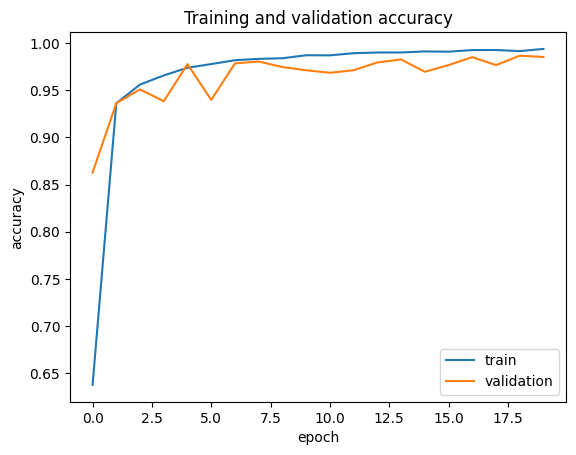

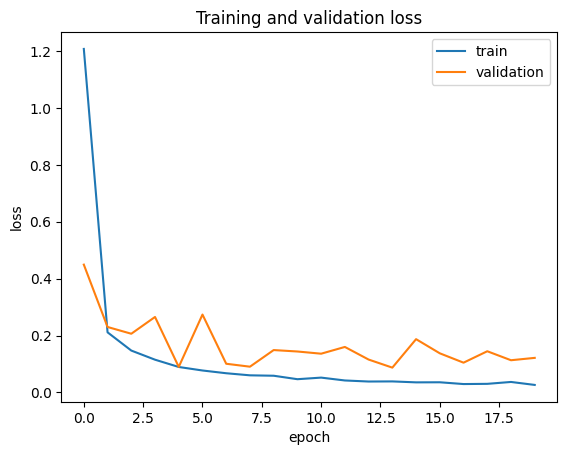

In [13]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

586/586 ━━━━━━━━━━━━━━━━━━━━ 155s 262ms/step - accuracy: 0.9826 - loss: 0.0894

Evaluation Accuracy =  98.31% 
Evaluation loss =  0.086839
